## Data preprocessing

In [1]:
import sklearn
import pandas as pd
import numpy as np

from sklearn import datasets

In [2]:
wine = datasets.load_wine(as_frame=True)
df = wine.data

df.shape

(178, 13)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [4]:
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

std = StandardScaler()
df_std = std.fit_transform(df)

pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_std)

df_pca_df = pd.DataFrame(df_pca, columns=['PC1', 'PC2','PC3'])
df_pca_df['target'] = wine.target
df_pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     178 non-null    float64
 1   PC2     178 non-null    float64
 2   PC3     178 non-null    float64
 3   target  178 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 5.7 KB


Text(0, 0.5, 'var_ratio')

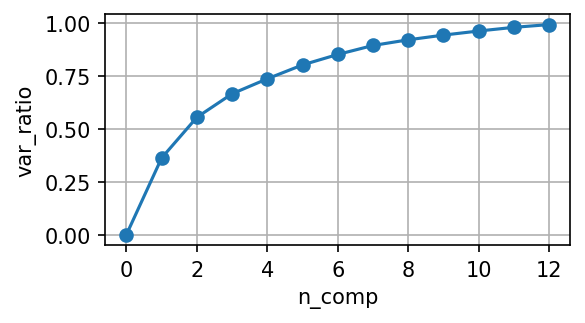

In [6]:
import matplotlib.pyplot as plt

nums = np.arange(13)
var_ratio = []
for num in nums:
    pca = PCA(n_components=num)
    df_pca = pca.fit_transform(df_std)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))
    
plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums, var_ratio, marker='o')
plt.xlabel('n_comp')
plt.ylabel('var_ratio')